# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import itertools
from itertools import combinations
import math

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [ ]:
df = pd.read_csv('/content/CC GENERAL.csv', delimiter=',')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

###Cek Struktur tiap dataset

In [ ]:
# Cek struktur dataset

# Display dataset shape
print("Dataset Shape:", df.shape)

# Display dataset info
df.info()

# Display dataset description
print("\nDataset Description:")
print(df.describe())

Dataset Shape: (8950, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-

###Cek missing values, NaN values, duplicated values

In [ ]:
#Check Values
print("\nMissing Values:")
print(df.isnull().sum())
print("\nNan Values:")
print(df.isna().sum())
print("\nDuplicate Values:")
print(df.duplicated().sum())


Missing Values:
CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Nan Values:
CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES               

###Cek distribusi nilai

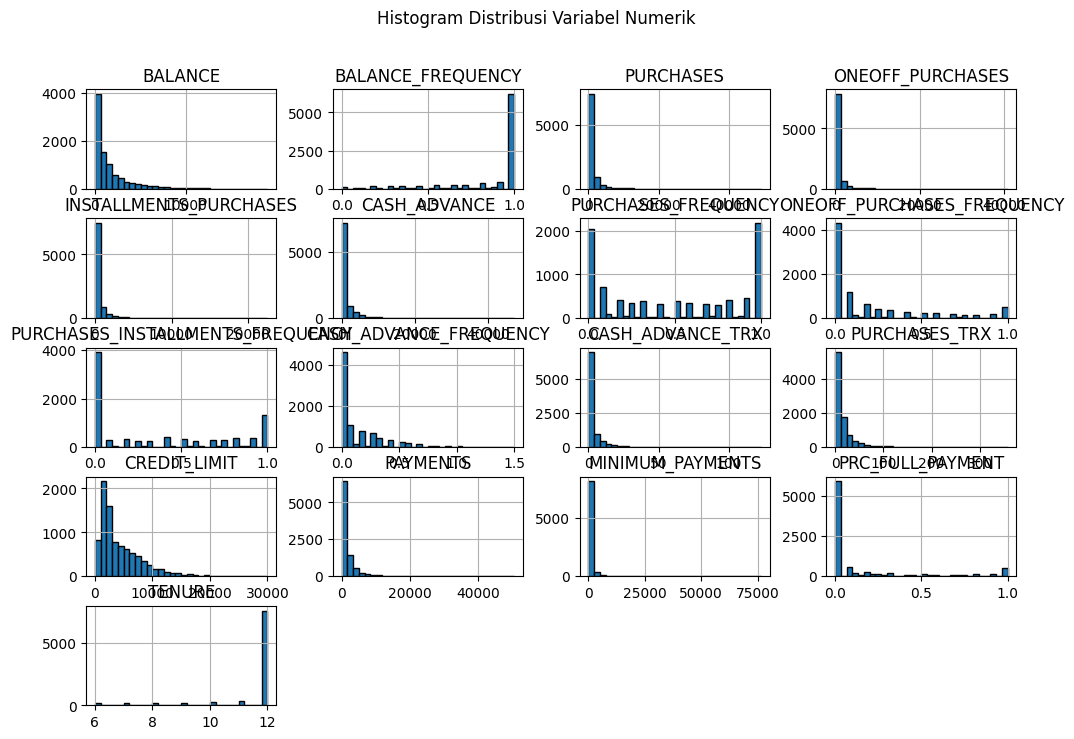

In [ ]:
# Visualisasi Distribusi Variabel Numerik
numerical_columns = df.select_dtypes(include=["number"]).columns

# Histogram untuk distribusi data numerik
df[numerical_columns].hist(figsize=(12, 8), bins=30, edgecolor="black")
plt.suptitle("Histogram Distribusi Variabel Numerik")
plt.show()

### Cek outlier

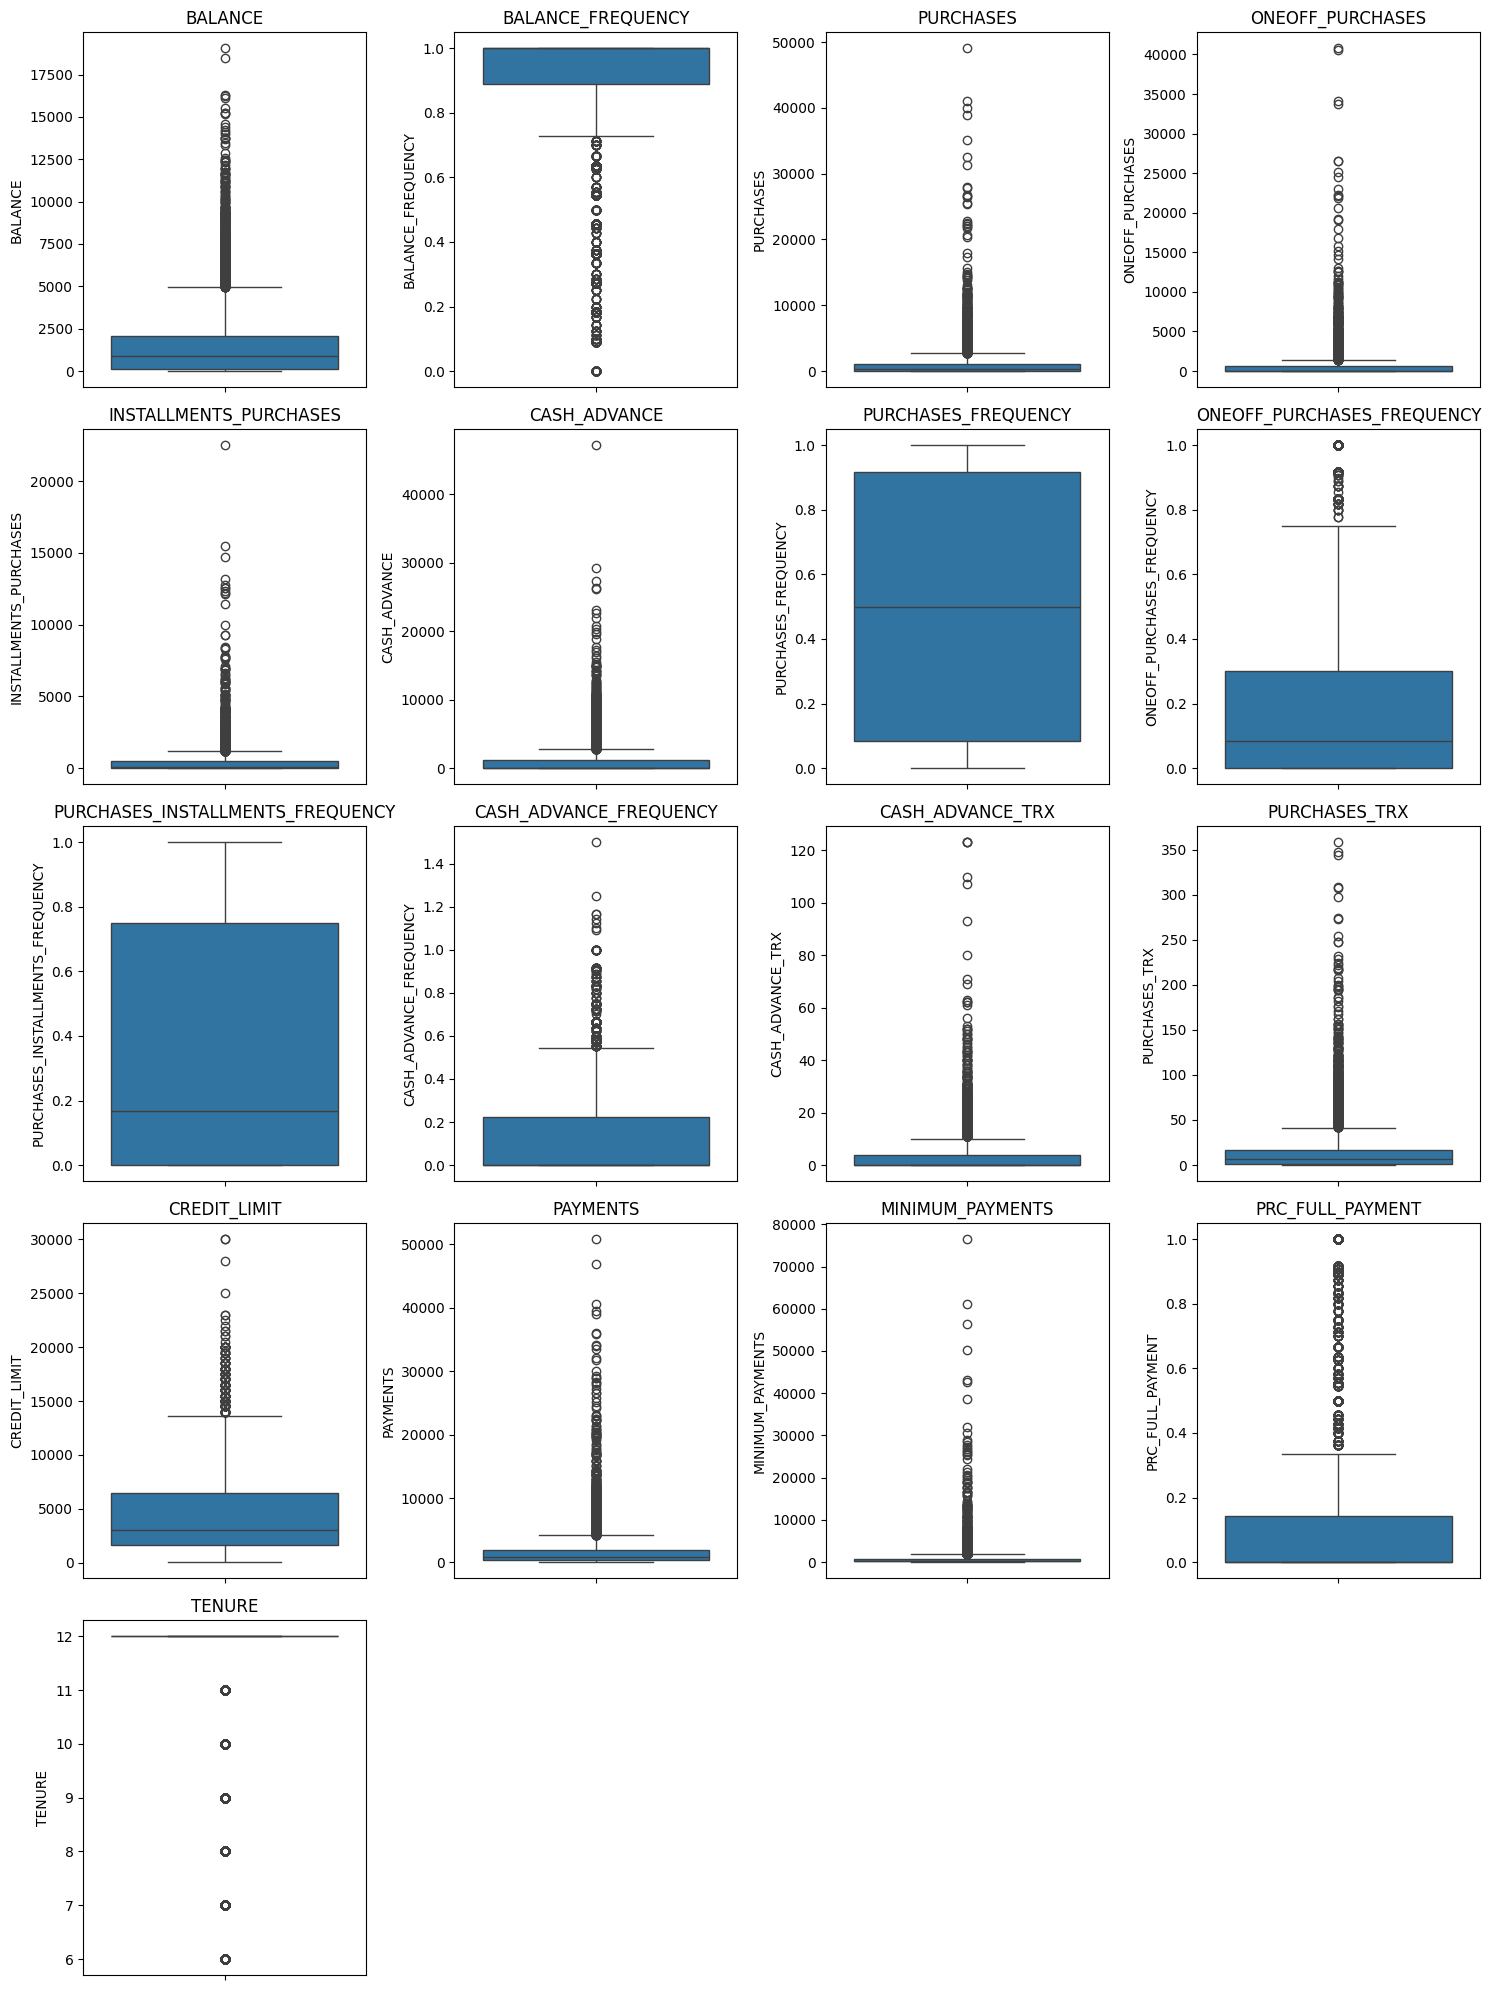

In [ ]:
# Pilih semua fitur numerik
numerical_features = df.select_dtypes(include=["number"]).columns

# Tentukan jumlah baris dan kolom otomatis
num_features = len(numerical_features)
num_cols = 4  # Banyaknya kolom dalam grid
num_rows = math.ceil(num_features / num_cols)  # Hitung jumlah baris otomatis

# Buat boxplot
plt.figure(figsize=(15, num_rows * 4))  # Sesuaikan ukuran figurenya

for i, col in enumerate(numerical_features, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()


###Cek nilai korelasi antar variable

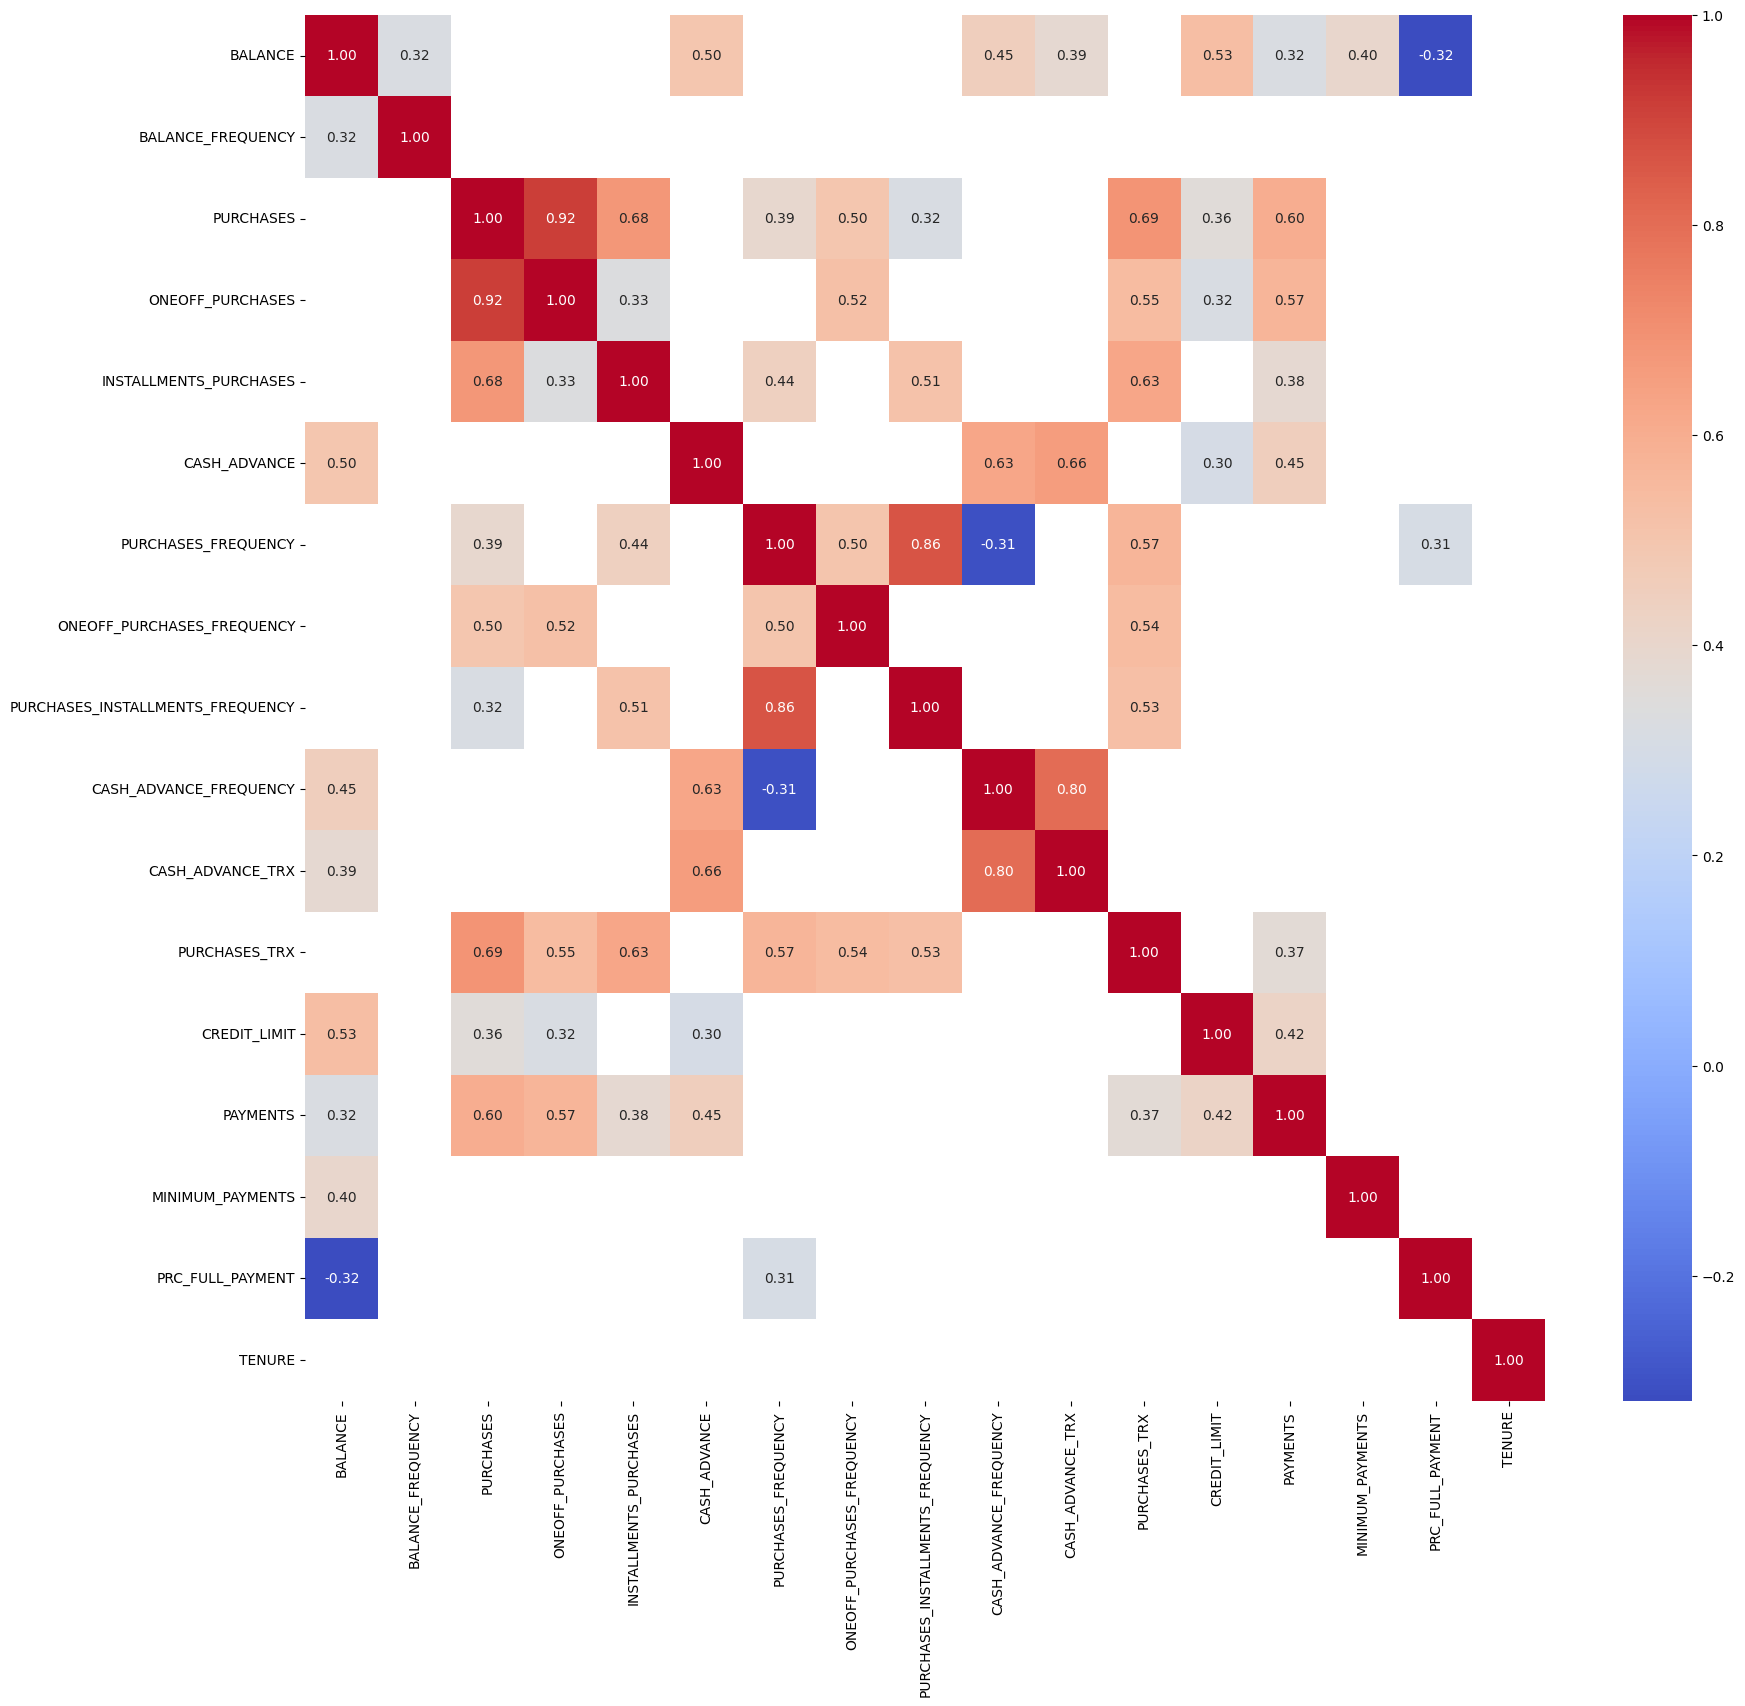

In [ ]:
# Analisis Korelasi dengan Heatmap
corr_matrix = df[numerical_columns].corr()
high_corr_features = corr_matrix[abs(corr_matrix) > 0.3]  # Ambang batas 0.3
plt.figure(figsize=(20, 18))
sns.heatmap(high_corr_features, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

###Data cleaning, data transformation dan normalization data

In [ ]:
from sklearn.preprocessing import RobustScaler

# 1. Backup data asli
df_backup = df.copy()
df_backup = df_backup.drop('CUST_ID', axis=1)

# 2. Tangani Missing Values
# CREDIT_LIMIT (1 missing): ganti dengan median (karena skewed)
df_backup['CREDIT_LIMIT'].fillna(df_backup['CREDIT_LIMIT'].median(), inplace=True)

# MINIMUM_PAYMENTS (313 missing): ganti juga dengan median
df_backup['MINIMUM_PAYMENTS'].fillna(df_backup['MINIMUM_PAYMENTS'].median(), inplace=True)

# 3. Kolom untuk transformasi log (hindari log(0) dengan tambah 1)
cols_log_transform = [
    'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
    'CASH_ADVANCE', 'PAYMENTS', 'MINIMUM_PAYMENTS'
]

for col in cols_log_transform:
    df_backup[col] = np.log1p(df_backup[col])

# 4. Scaling semua kolom numerik kecuali ID dan TENURE
cols_to_scale = df_backup.columns.drop('TENURE')

scaler = RobustScaler()
df_backup[cols_to_scale] = scaler.fit_transform(df_backup[cols_to_scale])

<ipython-input-8-08d32763ef22>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_backup['CREDIT_LIMIT'].fillna(df_backup['CREDIT_LIMIT'].median(), inplace=True)
<ipython-input-8-08d32763ef22>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].metho

In [ ]:
df_backup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   float64
 11  PURCHASES_TRX                     8950 non-null   float64
 12  CREDIT

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [ ]:
# KMeans dengan 3 cluster (kamu bisa coba juga elbow method)
kmeans_all = KMeans(n_clusters=3, random_state=42)
df_backup['Cluster_All'] = kmeans_all.fit_predict(df_backup)

# Melihat jumlah anggota tiap klaster
df_backup['Cluster_All'].value_counts()

,count
Cluster_All,
1,5238
2,2378
0,1334


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

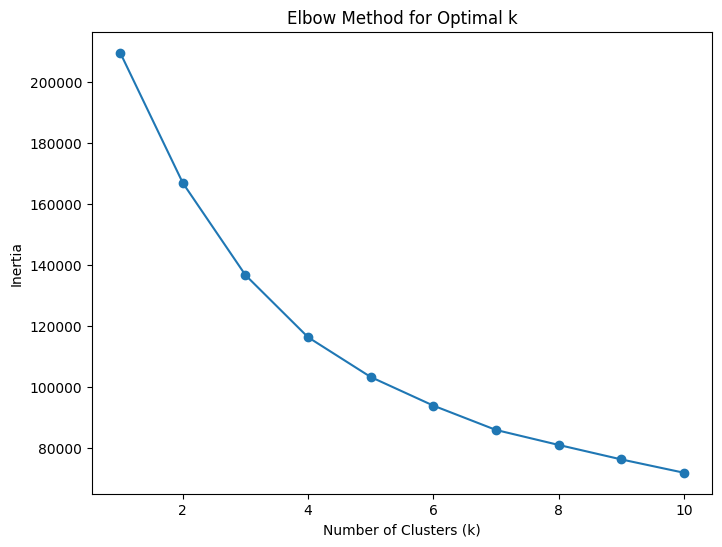

In [ ]:
# prompt: Create elbow method

# Elbow Method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(df_backup)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()


In [ ]:
# Calculate Silhouette Score
silhouette_avg = silhouette_score(df_backup, df_backup['Cluster_All'])
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.24430068025599766


## **c. Feature Selection (Opsional)**

### Clustering dengan atribut PURCHASES dan ONEOFF_PURCHASES

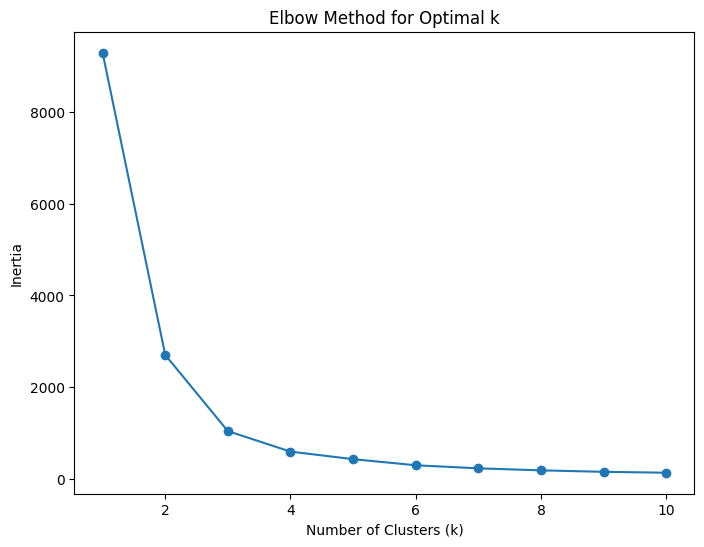

In [ ]:
X_purchase = df_backup[['PURCHASES', 'ONEOFF_PURCHASES']]

# Elbow Method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X_purchase)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [ ]:
#Train Model
kmeans_purchase = KMeans(n_clusters=2, random_state=42)
df_backup['Cluster_Purchase'] = kmeans_purchase.fit_predict(X_purchase)

# Calculate Silhouette Score
silhouette_avg = silhouette_score(X_purchase, df_backup['Cluster_Purchase'])
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.6853441382144607


###Clustering dengan atribut PURCHASES_FREQUENCY dan PURCHASES_INSTALLMENTS_FREQUENCY

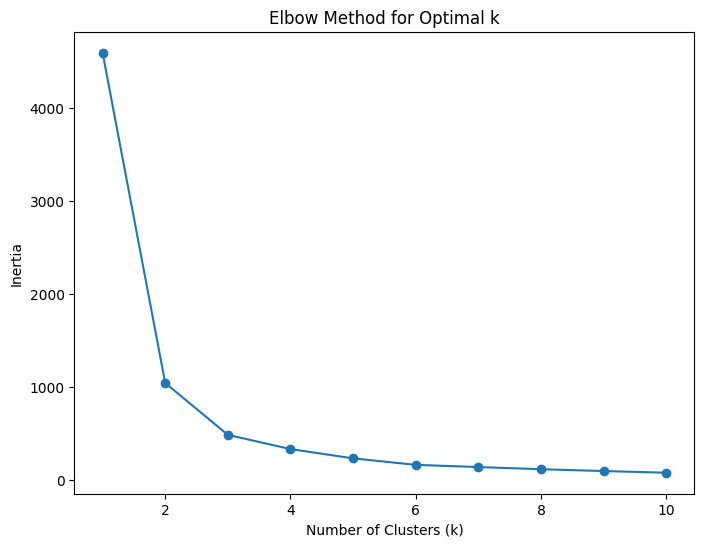

In [ ]:
X_freq = df_backup[['PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY']]

# Elbow Method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X_freq)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [ ]:
#Train Model
kmeans_freq = KMeans(n_clusters=2, random_state=42)
df_backup['Cluster_Frequency'] = kmeans_freq.fit_predict(X_freq)

# Calculate Silhouette Score
silhouette_avg = silhouette_score(X_freq, df_backup['Cluster_Frequency'])
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.676354875308142


In [ ]:
feature_groups = {
    "spending": ['PURCHASES', 'PURCHASES_FREQUENCY', 'PRCFULLPAYMENT'],
    "cash_advance": ['CASH_ADVANCE', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX'],
    "credit": ['BALANCE', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS'],
    "purchase_detail": ['ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES'],
    "transaction_volume": ['PURCHASES_TRX'],
    "tenure": ['TENURE']
}

selected_combinations = [
    ['PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PRC_FULL_PAYMENT'],
    ['PURCHASES', 'CASH_ADVANCE_FREQUENCY', 'BALANCE'],
    ['PURCHASES_FREQUENCY', 'CASH_ADVANCE_TRX', 'PAYMENTS'],
    ['PURCHASES', 'MINIMUM_PAYMENTS', 'CREDIT_LIMIT'],
    ['PURCHASES_TRX', 'CASH_ADVANCE', 'BALANCE'],
    ['PURCHASES', 'PURCHASES_FREQUENCY', 'CASH_ADVANCE_FREQUENCY'],
    ['PURCHASES', 'CASH_ADVANCE', 'PAYMENTS', 'TENURE'],
    ['PRC_FULL_PAYMENT', 'MINIMUM_PAYMENTS', 'BALANCE'],
]


results = []

for feature_set in selected_combinations:
    data = df_backup[feature_set].copy()
    data = data.dropna()

    # Coba clustering dengan beberapa nilai k
    for k in range(2, 7):
        kmeans = KMeans(n_clusters=k, random_state=42)
        cluster_labels = kmeans.fit_predict(df_backup)
        score = silhouette_score(df_backup, cluster_labels)

        results.append({
            'features': feature_set,
            'k': k,
            'silhouette_score': score
        })


results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='silhouette_score', ascending=False)
print(results_df.head(10))  # Top 10 hasil terbaik

                                             features  k  silhouette_score
1   [PURCHASES, CASH_ADVANCE, CREDIT_LIMIT, PRC_FU...  3          0.324234
6        [PURCHASES, CASH_ADVANCE_FREQUENCY, BALANCE]  3          0.324234
36      [PRC_FULL_PAYMENT, MINIMUM_PAYMENTS, BALANCE]  3          0.324234
31        [PURCHASES, CASH_ADVANCE, PAYMENTS, TENURE]  3          0.324234
26  [PURCHASES, PURCHASES_FREQUENCY, CASH_ADVANCE_...  3          0.324234
21             [PURCHASES_TRX, CASH_ADVANCE, BALANCE]  3          0.324234
16        [PURCHASES, MINIMUM_PAYMENTS, CREDIT_LIMIT]  3          0.324234
11  [PURCHASES_FREQUENCY, CASH_ADVANCE_TRX, PAYMENTS]  3          0.324234
30        [PURCHASES, CASH_ADVANCE, PAYMENTS, TENURE]  2          0.292882
20             [PURCHASES_TRX, CASH_ADVANCE, BALANCE]  2          0.292882


In [ ]:
df_combinationtwo = df_backup.copy()
df_combinationtwo = df_combinationtwo.drop(columns=['Cluster_All', 'Cluster_Purchase', 'Cluster_Frequency'])
# Buat list semua kolom numerik (exclude ID kalau masih ada)
numerical_columns = df_combinationtwo.columns.tolist()

# Simpan hasil evaluasi
results = []

# Loop kombinasi 2 fitur
for comb in combinations(numerical_columns, 2):
    X = df_combinationtwo[list(comb)].copy()
    for k in range(2, 6):  # bisa sesuaikan nilai k di sini
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(X)
        score = silhouette_score(X, labels)

        results.append({
            'features': comb,
            'k': k,
            'silhouette_score': score
        })

# Ubah ke DataFrame untuk lihat hasilnya
result_df = pd.DataFrame(results)
result_df = result_df.sort_values(by='silhouette_score', ascending=False)

print(result_df.head(10))  # top 10 kombinasi terbaik

                                              features  k  silhouette_score
320                             (CASH_ADVANCE, TENURE)  2          0.824170
360                      (PURCHASES_FREQUENCY, TENURE)  2          0.823073
276                   (INSTALLMENTS_PURCHASES, TENURE)  2          0.822142
228                         (ONEOFF_PURCHASES, TENURE)  2          0.820594
428         (PURCHASES_INSTALLMENTS_FREQUENCY, TENURE)  2          0.815752
121                        (BALANCE_FREQUENCY, TENURE)  3          0.795302
356            (PURCHASES_FREQUENCY, PRC_FULL_PAYMENT)  2          0.793669
272         (INSTALLMENTS_PURCHASES, PRC_FULL_PAYMENT)  2          0.792567
316                   (CASH_ADVANCE, PRC_FULL_PAYMENT)  2          0.791980
424  (PURCHASES_INSTALLMENTS_FREQUENCY, PRC_FULL_PA...  2          0.789939


###Analisis perbandingan clustering

Dari hasil yang saya dapatkan, saya mendapat kesimpulan seperti ini :


1. Percobaan 1

Clustering dilakukan menggunakan seluruh atribut dalam dataset Hasilnya menunjukkan Silhouette Score sebesar 0.244, yang menandakan bahwa segmentasi tidak terlalu baik ketika semua fitur dimasukkan tanpa seleksi.


2. Percobaan 2

Pemilihan fitur dilakukan berdasarkan korelasi tertinggi (≥ 0.92) dari heatmap, yaitu antara atribut PURCHASES dan ONEOFF_PURCHASES. Kombinasi ini menghasilkan Silhouette Score sebesar 0.676, yang menunjukkan peningkatan signifikan dibandingkan penggunaan semua fitur.


3. Percobaan 3

Atribut dipilih berdasarkan pertimbangan pribadi terhadap nilai dan kebermaknaannya, seperti PURCHASES, CASH_ADVANCE, CREDIT_LIMIT, dan PRC_FULL_PAYMENT. Dengan jumlah klaster k = 3, hasil clustering menghasilkan Silhouette Score sebesar 0.324.

4. Percobaan 4

Eksperimen dilakukan dengan kombinasi acak dua atribut. Hasil terbaik diperoleh dari kombinasi CASH_ADVANCE dan TENURE, dengan jumlah klaster k = 2, menghasilkan Silhouette Score tertinggi sebesar 0.824. Ini menunjukkan bahwa dua fitur tersebut memberikan segmentasi yang paling optimal secara matematis.



**Kesimpulan**:

Berdasarkan hasil percobaan clustering, dapat disimpulkan bahwa proses feature selection memiliki peran yang sangat penting. Penggunaan seluruh fitur justru memberikan hasil segmentasi terburuk karena kemungkinan adanya fitur yang tidak relevan atau mengandung noise. Meskipun fitur dengan korelasi tinggi tampak menjanjikan, hal tersebut tidak selalu menghasilkan klaster yang optimal, karena korelasi hanya menunjukkan hubungan linier, bukan kekuatan pemisahan antar kelompok. Pemilihan fitur berdasarkan nilai dan logika domain juga belum tentu efektif jika fitur-fitur tersebut tidak saling mendukung dalam membentuk struktur klaster yang jelas. Menariknya, hasil terbaik justru ditemukan dari kombinasi sederhana dua fitur yang memiliki makna kontras, yaitu CASH_ADVANCE dan TENURE, yang mampu menghasilkan segmentasi paling optimal. Hal ini menegaskan bahwa dalam clustering, kualitas fitur jauh lebih penting dibandingkan kuantitas.

Note :

> Clustering bukan soal banyaknya fitur, tapi soal bagaimana fitur-fitur tersebut berkontribusi dalam membentuk batas alami antar kelompok.







In [ ]:
df_backup.drop(columns=['Cluster_All', 'Cluster_Purchase', 'Cluster_Frequency'])
X_fix = df_backup[['CASH_ADVANCE', 'TENURE']]

kmeans_purchase = KMeans(n_clusters=2, random_state=42)
df_backup['Cluster_Fix'] = kmeans_purchase.fit_predict(X_fix)

df_backup['Cluster_Fix'].value_counts()

,count
Cluster_Fix,
0,8185
1,765


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

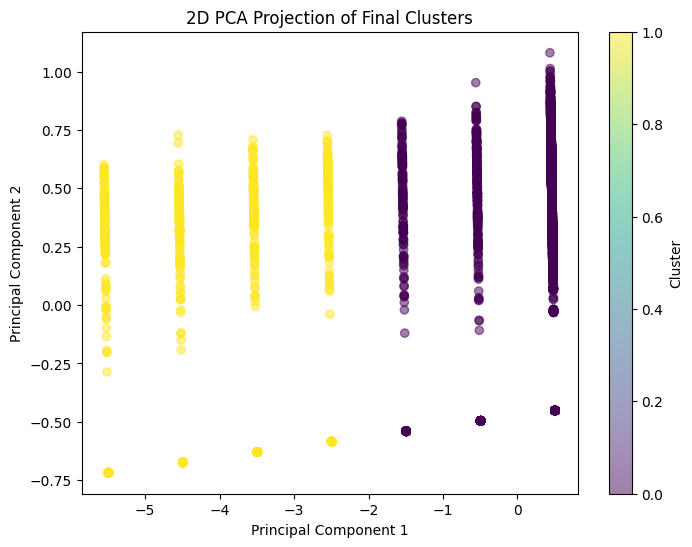

In [ ]:
# Hanya pakai fitur numerik yang digunakan buat cluster fix
fitur_fix = ['CASH_ADVANCE', 'TENURE']

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_backup[fitur_fix])

df_pca = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
df_pca['Cluster_Fix'] = df_backup['Cluster_Fix']  # Jangan reassign pakai label lain!

# Visualisasi
plt.figure(figsize=(8, 6))
scatter = plt.scatter(df_pca["PC1"], df_pca["PC2"], c=df_pca["Cluster_Fix"], cmap="viridis", alpha=0.5)
plt.colorbar(scatter, label="Cluster")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("2D PCA Projection of Final Clusters")
plt.show()

In [ ]:
df_pca.value_counts()

,,,count
PC1,PC2,Cluster_Fix,
0.503232,-0.451120,0,4081
-0.495780,-0.495571,0,146
-1.494791,-0.540023,0,104
-5.490838,-0.717827,1,83
-3.492814,-0.628925,1,78
...,...,...,...
0.451905,0.702406,0,1
0.451904,0.702436,0,1
0.451897,0.702587,0,1


In [ ]:
df_backup['Cluster_Fix'].value_counts()

,count
Cluster_Fix,
0,8185
1,765


## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [ ]:
df_backup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   float64
 11  PURCHASES_TRX                     8950 non-null   float64
 12  CREDIT

In [ ]:
df_backup.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster_All,Cluster_Purchase,Cluster_Frequency,Cluster_Fix
count,8.950000e+03,8950.000000,8.950000e+03,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,...,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,3.588476e-01,-1.104565,-3.000660e-01,-0.072212,-0.186511,0.473044,-0.011579,0.397082,0.263694,0.608150,...,0.481865,0.304956,-0.081250,0.110673,1.076004,11.517318,1.116648,0.243464,0.411061,0.085475
std,1.080833e+00,2.132138,8.816282e-01,0.510413,0.501137,0.508277,0.481645,0.994454,0.529930,0.900547,...,1.553603,0.742581,0.995243,0.767165,2.047496,1.338331,0.633393,0.429197,0.492054,0.279603
min,-4.535045e-01,-9.000009,-1.780990e+00,-0.576007,-0.731443,0.000000,-0.600000,-0.277777,-0.222223,0.000000,...,-0.437500,-0.602041,-4.223218,-3.756266,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000
25%,-3.868942e-01,-1.000000,-6.612623e-01,-0.576007,-0.731443,0.000000,-0.500000,-0.277777,-0.222223,0.000000,...,-0.375000,-0.285714,-0.502153,-0.393858,0.000000,12.000000,1.000000,0.000000,0.000000,0.000000
50%,2.951740e-17,0.000000,1.342242e-16,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,1.000000,0.000000,0.000000,0.000000
75%,6.131058e-01,0.000000,3.387377e-01,0.423993,0.268557,1.000000,0.500000,0.722223,0.777777,1.000000,...,0.625000,0.714286,0.497847,0.606142,1.000000,12.000000,2.000000,0.000000,1.000000,0.000000
max,9.434627e+00,0.000000,1.483445e+00,1.093027,0.897520,1.533659,0.600000,3.055557,1.111111,6.750007,...,21.937500,5.510204,2.550776,3.604274,7.000007,12.000000,2.000000,1.000000,1.000000,1.000000


In [ ]:
df_backup['Cluster_Fix'].value_counts()

,count
Cluster_Fix,
0,8185
1,765


In [ ]:
cols_to_scale = df_backup.drop(columns=['Cluster_All', 'Cluster_Purchase','Cluster_Fix', 'Cluster_Frequency','TENURE']).columns.tolist()

df_backup[cols_to_scale] = scaler.inverse_transform(df_backup[cols_to_scale])

df_backup.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster_All,Cluster_Purchase,Cluster_Frequency,Cluster_Fix
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,...,8950.000000,8950.000000,8.950000e+03,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,4.899647,3.204274,3.352403,3.319086,0.490351,0.202458,0.364437,0.135144,...,14.709832,4494.282473,6.624540e+00,5.916079,0.153715,11.517318,1.116648,0.243464,0.411061,0.085475
std,2081.531879,0.236904,2.916872,3.246365,3.082973,3.566298,0.401371,0.298336,0.397448,0.200121,...,24.857649,3638.646702,1.591763e+00,1.169929,0.292499,1.338331,0.633393,0.429197,0.492054,0.279603
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,50.000000,8.881784e-16,0.018982,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000
25%,128.281915,0.888889,3.704627,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,...,1.000000,1600.000000,5.951361e+00,5.146667,0.000000,12.000000,1.000000,0.000000,0.000000,0.000000
50%,873.385231,1.000000,5.892417,3.663562,4.499810,0.000000,0.500000,0.083333,0.166667,0.000000,...,7.000000,3000.000000,6.754489e+00,5.747301,0.000000,12.000000,1.000000,0.000000,0.000000,0.000000
75%,2054.140036,1.000000,7.013133,6.360274,6.151961,7.016449,0.916667,0.300000,0.750000,0.222222,...,17.000000,6500.000000,7.550732e+00,6.671670,0.142857,12.000000,2.000000,0.000000,1.000000,0.000000
max,19043.138560,1.000000,10.800403,10.615512,10.021315,10.760839,1.000000,1.000000,1.000000,1.500000,...,358.000000,30000.000000,1.083412e+01,11.243832,1.000000,12.000000,2.000000,1.000000,1.000000,1.000000


In [ ]:
# prompt: in df_backup drop 'Cluster_All', 'Cluster_Purchase', 'Cluster_Frequency'

df_backup = df_backup.drop(columns=['Cluster_All', 'Cluster_Purchase', 'Cluster_Frequency'])


In [ ]:
df_backup.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster_Fix
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8.950000e+03,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,4.899647,3.204274,3.352403,3.319086,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.282473,6.624540e+00,5.916079,0.153715,11.517318,0.085475
std,2081.531879,0.236904,2.916872,3.246365,3.082973,3.566298,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.646702,1.591763e+00,1.169929,0.292499,1.338331,0.279603
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,8.881784e-16,0.018982,0.000000,6.000000,0.000000
25%,128.281915,0.888889,3.704627,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,5.951361e+00,5.146667,0.000000,12.000000,0.000000
50%,873.385231,1.000000,5.892417,3.663562,4.499810,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,6.754489e+00,5.747301,0.000000,12.000000,0.000000
75%,2054.140036,1.000000,7.013133,6.360274,6.151961,7.016449,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,7.550732e+00,6.671670,0.142857,12.000000,0.000000
max,19043.138560,1.000000,10.800403,10.615512,10.021315,10.760839,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,1.083412e+01,11.243832,1.000000,12.000000,1.000000


In [ ]:
df_backup.groupby('Cluster_Fix').mean(numeric_only=True)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
Cluster_Fix,,,,,,,,,,,,,,,,,
0,1609.578921,0.885356,4.981165,3.289001,3.430514,3.219489,0.496251,0.209265,0.371305,0.127840,3.174465,15.521075,4645.018302,6.721097,5.966865,0.152323,11.897740
1,1081.890507,0.790767,4.027458,2.297749,2.516670,4.384705,0.427223,0.129627,0.290961,0.213298,4.044444,6.030065,2881.507625,5.591447,5.372697,0.168605,7.447059


In [ ]:
df_backup.groupby('Cluster_Fix').describe()

BALANCE                                                         \
              count         mean          std  min         25%         50%   
Cluster_Fix                                                                  
0            8185.0  1609.578921  2117.386538  0.0  135.418099  915.981419   
1             765.0  1081.890507  1571.862698  0.0   65.458720  486.661842   

                                      BALANCE_FREQUENCY            ...  \
                     75%          max             count      mean  ...   
Cluster_Fix                                                        ...   
0            2125.107734  19043.13856            8185.0  0.885356  ...   
1            1362.418281  15258.22590             765.0  0.790767  ...   

            PRC_FULL_PAYMENT       TENURE                                   \
                         75%  max   count       mean       std   min   25%   
Cluster_Fix                                                                  
0                      0.125  1.0  8185.0  11.897740  0.386637  10.0  12.0   
1                      0.200  1.0   765.0   7.447059  1.113404   6.0   6.0   

                               
              50%   75%   max  
Cluster_Fix                    
0            12.0  12.0  12.0  
1             7.0   8.0   9.0  

[2 rows x 136 columns]

In [ ]:
df_backup['Cluster_Fix'].value_counts(normalize=True)

,proportion
Cluster_Fix,
0,0.914525
1,0.085475


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

Tulis hasil interpretasinya di sini.

1. Cluster 0 (91.45%) – Pelanggan Loyal dan Stabil
 * Saldo Rata-Rata (BALANCE): Rp1.609.579
 * Limit Kredit (CREDIT_LIMIT): Rp4.645.018
 * Frekuensi Pembayaran Penuh (PRC_FULL_PAYMENT): 15.2%

 * Frekuensi Transaksi (PURCHASES_FREQUENCY): 0.496
 * Frekuensi Tarik Tunai (CASH_ADVANCE_FREQUENCY): 0.127
 * Tenure (Lama Berlangganan): 11.9 bulan

 Analisis : Cluster ini merepresentasikan mayoritas pelanggan yang loyal, memiliki aktivitas kartu kredit stabil dan sehat, serta minim penarikan tunai. Potensi untuk loyalti program, kredit tambahan, atau layanan eksklusif.


2. Cluster 1 (8.55%) – Pelanggan Baru atau Berisiko

 * Saldo Rata-Rata (BALANCE): Rp1.081.891

 * Limit Kredit (CREDIT_LIMIT): Rp2.881.508

 * Frekuensi Pembayaran Penuh (PRC_FULL_PAYMENT): 16.8%

 * Frekuensi Transaksi (PURCHASES_FREQUENCY): 0.427
 * Frekuensi Tarik Tunai (CASH_ADVANCE_FREQUENCY): 0.213

 * Tenure (Lama Berlangganan): 7.45 bulan

 Analisis : Cluster ini memiliki ciri khas pengguna baru atau pengguna yang lebih rentan terhadap penggunaan tarik tunai. Perlu pendekatan onboarding, monitoring perilaku finansial, dan edukasi untuk meningkatkan keterlibatan dan mengurangi risiko.

# Contoh interpretasi [TEMPLATE]
# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1:
- **Rata-rata Annual Income (k$):** 48,260  
- **Rata-rata Spending Score (1-100):** 56.48  
- **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan menengah dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang moderat dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka.

## Cluster 2:
- **Rata-rata Annual Income (k$):** 86,540  
- **Rata-rata Spending Score (1-100):** 82.13  
- **Analisis:** Cluster ini menunjukkan pelanggan dengan pendapatan tahunan tinggi dan pengeluaran yang sangat tinggi. Pelanggan di cluster ini merupakan kelompok premium dengan daya beli yang kuat dan cenderung mengeluarkan uang dalam jumlah besar untuk produk atau layanan.

## Cluster 3:
- **Rata-rata Annual Income (k$):** 87,000  
- **Rata-rata Spending Score (1-100):** 18.63  
- **Analisis:** Cluster ini terdiri dari pelanggan dengan pendapatan tahunan yang tinggi tetapi pengeluaran yang rendah. Mereka mungkin memiliki kapasitas finansial yang baik namun tidak terlalu aktif dalam berbelanja. Ini bisa menunjukkan bahwa mereka lebih selektif dalam pengeluaran mereka atau mungkin lebih cenderung untuk menyimpan uang.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [ ]:
df_backup.to_csv("dataset_fix.csv", index=False)